# Data Manipulation and Visualisation Project

Source : https://www.kaggle.com/datasets/lava18/google-play-store-apps

In [164]:
import os
import shutil

In [166]:
kaggle_token = {
    "username": "frangenna0612",
    "key": "2157e9379cdf1416cddfe202bf77dd17"
}
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as file:
    json.dump(kaggle_token, file)

# Imposta i permessi corretti
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

In [168]:
!kaggle datasets download -d lava18/google-play-store-apps --unzip

Dataset URL: https://www.kaggle.com/datasets/lava18/google-play-store-apps
License(s): CC-BY-SA-4.0


In [169]:
import pandas as pd
import numpy as np

df = pd.read_csv("googleplaystore.csv")
Gr = pd.read_csv("googleplaystore_user_reviews.csv")

### Preliminary exploration of the two dataframes

In [171]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
Gr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [45]:
#Dropping of rows with NaN values in the ‘Sentiment’ column, as they are not useful for analysis
Gr.dropna(subset=['Sentiment'], inplace=True)

In [47]:
# Extract rows with NaN in each specified column
nan_review = Gr[Gr['Translated_Review'].isna()].head()
nan_polarity = Gr[Gr['Sentiment_Polarity'].isna()].head()
nan_subjectivity = Gr[Gr['Sentiment_Subjectivity'].isna()].head()

# Combine the results into a single DataFrame
gr_nan_sample = pd.concat([nan_review, nan_polarity, nan_subjectivity])

# Display the combined sample
print(gr_nan_sample)

                                             App Translated_Review Sentiment  \
268                                         11st               NaN   Neutral   
15048        Birds Sounds Ringtones & Wallpapers               NaN   Neutral   
22092             Calorie Counter - MyFitnessPal               NaN   Neutral   
31623                                  DC Comics               NaN   Neutral   
52500  Garden Photo Frames - Garden Photo Editor               NaN   Neutral   

       Sentiment_Polarity  Sentiment_Subjectivity  
268                   0.0                     0.0  
15048                 0.0                     0.0  
22092                 0.0                     0.0  
31623                 0.0                     0.0  
52500                 0.0                     0.0  


Records with missing reviews are still valid, as the 'Neutral' sentiment exists.

## Data Cleaning

An overview of the DataFrame is required before proceeding.

In [52]:
df.shape

(10841, 13)

In [54]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [56]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [58]:
# Calculate total number of rows
total_rows = df.shape[0]

# Create boolean mask of duplicate rows (marks all but the first occurrence)
dup_mask = df.duplicated()

# Absolute count of duplicates
num_duplicates = dup_mask.sum()

# Percentage of duplicates
pct_duplicates = num_duplicates / total_rows * 100

print(f"Total rows: {total_rows}")
print(f"Duplicate rows: {num_duplicates}")
print(f"Duplicates (%): {pct_duplicates:.2f}%")

Total rows: 10841
Duplicate rows: 483
Duplicates (%): 4.46%


**Observations:**       
- Using nunique, it is observed that there are 3 unique values in the "Type" column. Since "Type" should only be "Free" or "Paid," this indicates an error.


- Some data types are incorrect:    
   "Reviews" should be an integer    
   "Last Updated" a datetime   
   "Installs" an integer.   

- 483 rows (4,46%) are duplicates  

### Corrections of data

In [62]:
df["Type"].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [64]:
df[df["Type"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [66]:
#Type = Nan can be replaced by 'Free', since the Price = 0
df["Type"].fillna("Free", inplace=True)

In [68]:
# Retrive the record where Type = 0
df[df["Type"] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The values in the record above are incorrect.    
**The correction starts with the category.**    
Based on the app name, the category should be Photography.    
The available categories will be checked to confirm the correct one.

In [71]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

The category of interest is **PHOTOGRAPHY.**   
The genres within this category will be showed.

In [74]:
photography_genres = df[df["Category"] == "PHOTOGRAPHY"]["Genres"].unique()
print(photography_genres)

['Photography']


Only one genre belongs to this category.    
The values in the record will be updated accordingly, and the remaining fields will be aligned.

In [77]:
# Filter only photography apps and create a copy of the dataset (df_photography)
df_photography = df[df["Category"] == "PHOTOGRAPHY"].copy()

# Modify the "Size" column in df_photography by converting numerical values and removing the "M"
df_photography["Size"] = pd.to_numeric(df_photography["Size"].str.replace("M", "", regex=True), errors="coerce")

# Calculate the mean size, ignoring NaN values
media_size_photography = df_photography["Size"].mean()

# If the mean exists, round it and append "M"
if not pd.isna(media_size_photography):
    media_size_photography = f"{round(media_size_photography, 1)}M"
else:
    media_size_photography = "Varies with device"

# Why this operation?
# The record in question has no valid size value. Thus, the category mean size is used as a substitute.

# Update the values for the specified app
df.loc[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame", 
       ["Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", 
        "Content Rating", "Genres", "Last Updated", "Current Ver", "Android Ver"]] = [
    "PHOTOGRAPHY", 1.9, 19, media_size_photography, "1,000+", "Free", 0, 
    "Everyone", "Photography", "February 11, 2018", "1.0.19", "4.0 and up"
]

In [79]:
df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,17.6M,"1,000+",Free,0,Everyone,Photography,"February 11, 2018",1.0.19,4.0 and up


The values are in the correct place.   
In the following code, the other columns will be converted to numeric values.

In [82]:
# Convert Reviews to numeric, replacing non-convertible ones with NaN, and replacing NaN with 0
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce").fillna(0).astype(int)

# Remove "+" and "," from the "Installs" column and convert values to integers
df["Installs"] = df["Installs"].str.replace("[+,]", "", regex=True).astype(int).astype("Int64")

'''Removal of "$" symbol from the "Price" column and convert values to strings, Rename "Price" column to include "$" symbol, and
finally Convert "Price ($)" column to numeric values'''

df['Price'] = df['Price'].astype(str).str.replace(r'[\$,]', '', regex=True)
df.rename(columns={'Price': 'Price ($)'}, inplace=True)
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

# Convert "Last Updated" to datetime, handling errors and forcing conversion where needed
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [84]:
print(df.dtypes)

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                      object
Installs                   Int64
Type                      object
Price ($)                float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


### Drop duplicates

In [87]:
df = df.drop_duplicates(subset=['App'], keep='first')

In [89]:
df.nunique()

App               9660
Category            33
Rating              39
Reviews           5330
Size               462
Installs            20
Type                 2
Price ($)           92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2817
Android Ver         33
dtype: int64

In [91]:
df.shape

(9660, 13)

### Handling Missing Values

In [94]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 0
Price ($)            0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**To handle missing values in "Rating", the status can be analyzed for each category.**

In [97]:
Status_category = df.groupby("Category").agg(
    total_apps=("App", "count"), #Count of total apps
    nan_ratings=("Rating", lambda x: x.isna().sum()),  # Count of Nan in Ratings column
    rating_std=("Rating", "std")  # Calculation of the standard deviation of ratings
)

print(Status_category)

                     total_apps  nan_ratings  rating_std
Category                                                
ART_AND_DESIGN               64            3    0.361229
AUTO_AND_VEHICLES            85           12    0.543692
BEAUTY                       53           11    0.362603
BOOKS_AND_REFERENCE         222           53    0.437649
BUSINESS                    420          157    0.659862
COMICS                       56            2    0.526317
COMMUNICATION               315           59    0.470260
DATING                      171           37    0.637786
EDUCATION                   119            1    0.263612
ENTERTAINMENT               102            0    0.328407
EVENTS                       64           19    0.419499
FAMILY                     1832          224    0.523323
FINANCE                     345           43    0.659147
FOOD_AND_DRINK              112           18    0.566901
GAME                        959           47    0.384116
HEALTH_AND_FITNESS          288

Looking closely at this table, it appears that in each category, the number of NaN is lower than the total number of apps.  
Furthermore, in relation to the number of apps, the standard deviation is negligible.

`NaN values can be replaced with the average rating of the corresponding category.`

In [100]:
# The average rating is calculated for each category, and transform is used to apply it to each row
df["Rating"] = df["Rating"].fillna(df.groupby("Category")["Rating"].transform("mean"))

In [102]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price ($)         0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          9660 non-null   float64       
 3   Reviews         9660 non-null   int32         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   Int64         
 6   Type            9660 non-null   object        
 7   Price ($)       9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 1.0+ MB


The number of NaN values in the Version columns is irrelevant.    
The data types are all correct.

The analysis can proceed

### Correlation

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

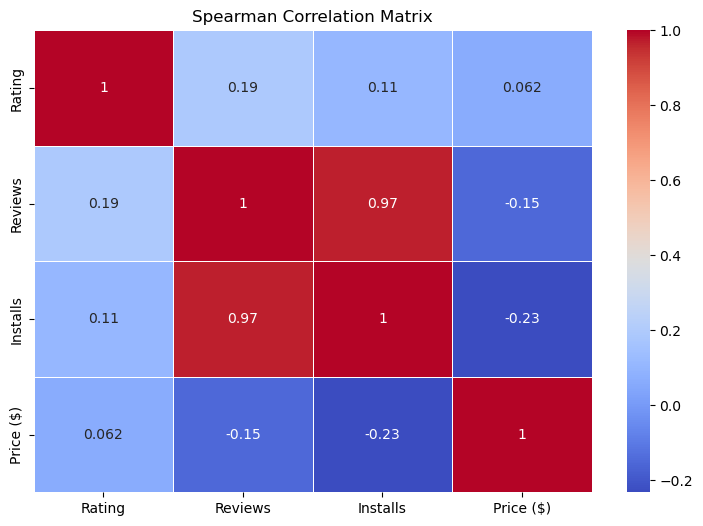

In [109]:
# Calculate the Spearman correlation matrix
spearman_corr = df[['Rating', 'Reviews', 'Installs', 'Price ($)']].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

In addition to the correlation between Number of Installs and Number of Reviews, no significant correlations were observed.
A weak positive correlation (ρ = 0.2) was found between Price and Number of Installs, suggesting that as the price increases, the number of installs tends to increase slightly. However, this relationship is weak and should be interpreted with caution.

It is important to note that `the correlation value obtained represents a relationship between the two variables and does not necessarily imply causality.`
This means that while the two variables move together, it does not indicate that one causes the other.

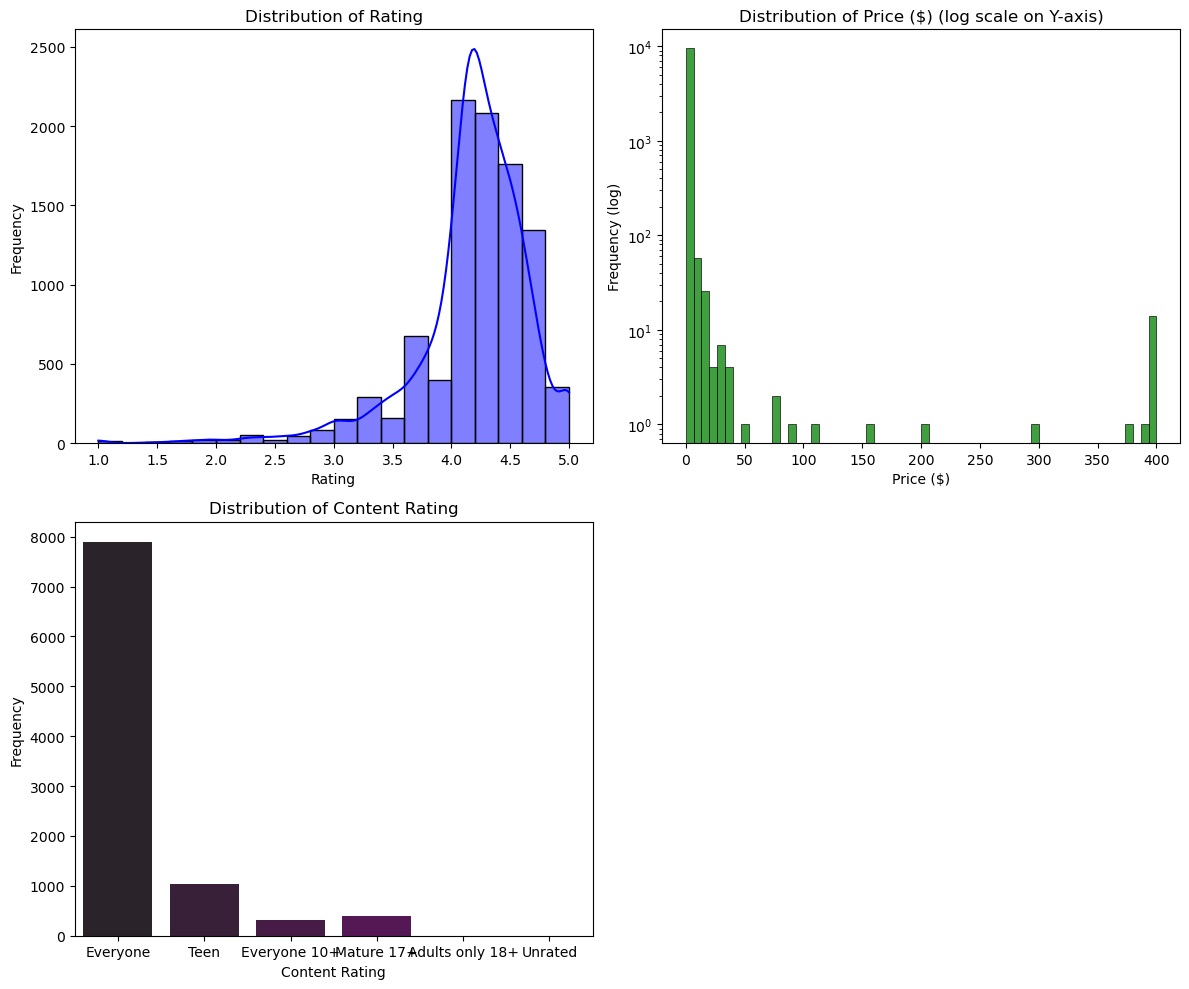

In [118]:
plt.figure(figsize=(12, 10))

# Histogram of Rating distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Rating'], kde=True, bins=20, color='blue')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Histogram of Price ($) distribution with log-scaled Y-axis
plt.subplot(2, 2, 2)
sns.histplot(df['Price ($)'], kde=False, bins=60, color='green')
plt.yscale('log')  # Logarithmic scale for Y-axis
plt.title('Distribution of Price ($) (log scale on Y-axis)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency (log)')

# Bar plot of Content Rating distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Content Rating', data=df, palette='dark:purple')
plt.title('Distribution of Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')

# Optimize layout
plt.tight_layout()
plt.show()

# Market Analysis

### Categories  
`Which categories dominate the market?`   
To address this question, an analysis will be conducted on the categories, number of installs, percentage of free apps, and other factors.

In [122]:
# Calculate the total number of installations per category
category_installs = df.groupby('Category')['Installs'].sum().reset_index()
category_installs = category_installs.sort_values(by='Installs', ascending=False)

# Calculate the percentage of free and paid apps per category
def free_paid_percentage(group):
    total = len(group)
    free = len(group[group['Type'] == 'Free']) / total * 100
    paid = len(group[group['Type'] == 'Paid']) / total * 100
    return pd.Series({'Free %': free, 'Paid %': paid})

category_prices = df.groupby('Category').apply(free_paid_percentage).reset_index()

# Merge the two dataframes to get a complete table
final_table = category_installs.merge(category_prices, on='Category')
print(final_table)


               Category     Installs      Free %     Paid %
0                  GAME  13878924415   91.449426   8.550574
1         COMMUNICATION  11038276251   91.428571   8.571429
2                 TOOLS   8001771915   90.568319   9.431681
3          PRODUCTIVITY   5793091369   92.513369   7.486631
4                SOCIAL   5487867902   98.744770   1.255230
5           PHOTOGRAPHY   4649148655   93.262411   6.737589
6                FAMILY   4427941505   90.010917   9.989083
7         VIDEO_PLAYERS   3926902720   97.546012   2.453988
8      TRAVEL_AND_LOCAL   2894887146   94.520548   5.479452
9    NEWS_AND_MAGAZINES   2369217760   99.212598   0.787402
10        ENTERTAINMENT   2113660000   98.039216   1.960784
11  BOOKS_AND_REFERENCE   1665969576   87.387387  12.612613
12      PERSONALIZATION   1532494782   78.457447  21.542553
13             SHOPPING   1400348785   99.009901   0.990099
14   HEALTH_AND_FITNESS   1144022512   94.791667   5.208333
15               SPORTS   1096474498   9

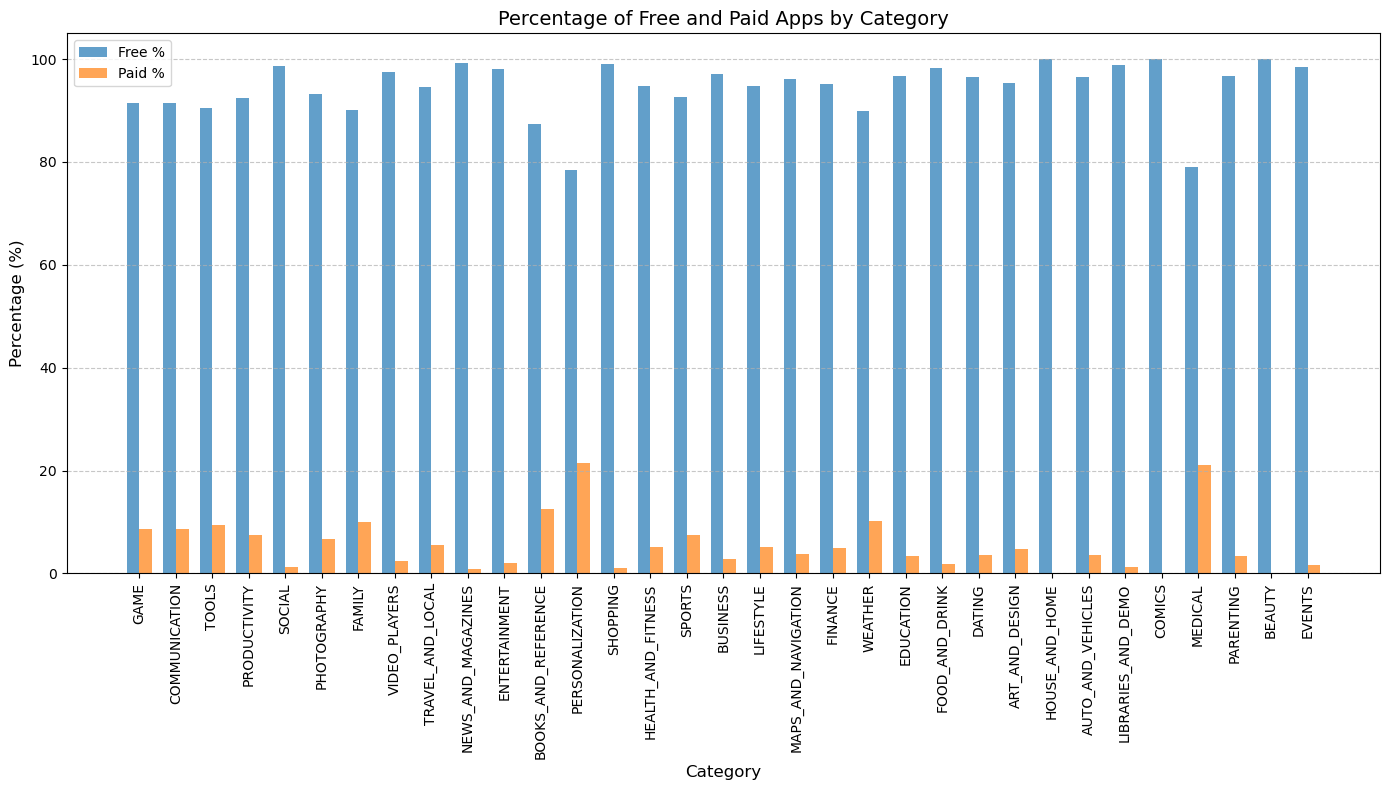

In [124]:
# Plotting the data 
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(final_table['Category']))

# Use different colors and add transparency
plt.bar(index, final_table['Free %'], bar_width, label='Free %', color='#1f77b4', alpha=0.7)
plt.bar([i + bar_width for i in index], final_table['Paid %'], bar_width, label='Paid %', color='#ff7f0e', alpha=0.7)

plt.xlabel('Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage of Free and Paid Apps by Category', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], final_table['Category'], rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Paid apps are significantly fewer**, exceeding 10% in only four categories.

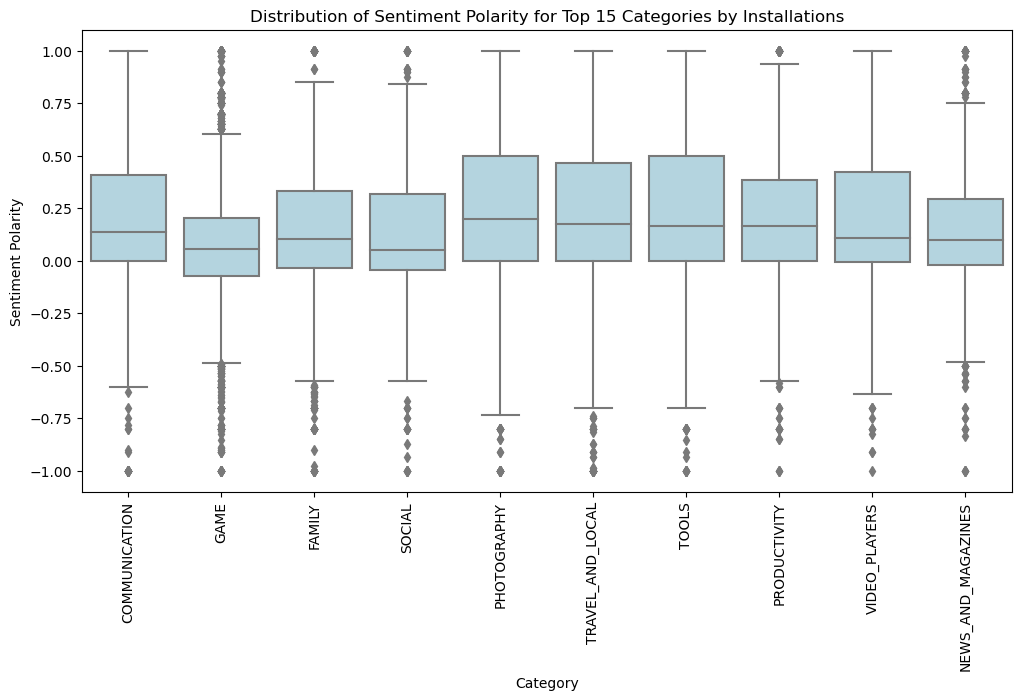

In [127]:
# Top 15 categories by total number of installations
top_15_categories = df.groupby('Category')['Installs'].sum().nlargest(10).index

# Merge the dataframes on the 'App' column
merged_df = pd.merge(df, Gr, on='App')

# Filter for categories with the most installations
filtered_df = merged_df[merged_df['Category'].isin(top_15_categories)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Category', y='Sentiment_Polarity', color='lightblue')
plt.xticks(rotation=90)
plt.title('Distribution of Sentiment Polarity for Top 15 Categories by Installations')
plt.xlabel('Category')
plt.ylabel('Sentiment Polarity')
plt.show()


The boxplots of various app categories indicate that the median Sentiment Polarity is similar across categories, suggesting that `the average sentiment of reviews does not differ substantially among them.` 
This implies that apps across all categories generally elicit similar reactions from reviewers.

However, the GAME category exhibits a higher number of outliers, both above and below the median.  
These outliers suggest that within this category, some apps receive reviews with extreme sentiments, both highly positive and highly negative.  
This can be attributed to:

**Polarization of Opinions** – Games tend to evoke strong emotions, leading to enthusiastic positive reviews and highly critical negative reviews.

 
**Varied User Experiences** –The quality of games can vary significantly, with some functioning perfectly and others having technical issues, resulting in extreme reviews.

**High Expectations** – Game users often have higher expectations. If a game fails to meet these, it may receive very negative reviews; conversely, highly engaging games can generate very positive reviews

In summary, the GAME category elicits more extreme reactions compared to others, with users being either very satisfied or very disappointed. To a lesser extent, this pattern is also observed in the News and Magazine category.  

### Genre   

According to the column description on Kaggle, `an app can belong to multiple genres simultaneously.`

The code should correctly handle these multi-genre combinations and assign a category to each genre based on the predominant category associated with it.

In [131]:
# Merge the two dataframes
merged_df = pd.merge(df, Gr, on='App')

# Create a new dataframe by expanding genres for each app
expanded_df = merged_df.assign(Genres=merged_df['Genres'].str.split(';')).explode('Genres')

# Create a list to add the genre and its associated category for each genre
genres_with_categories = []

# Loop through all unique genres in the expanded dataframe
for genre in expanded_df['Genres'].unique():
    # Identify the categories associated with the genre
    categories = expanded_df[expanded_df['Genres'] == genre]['Category'].unique()

    # If the genre has more than one category, take the most frequent one
    if len(categories) > 1:
        category = expanded_df[expanded_df['Genres'] == genre]['Category'].mode()[0]
    else:
        category = categories[0]

    # Add the genre and category to the list
    genres_with_categories.append((genre, category))

# Create a dataframe with the results
genres_categories_df = pd.DataFrame(genres_with_categories, columns=['Genre', 'Category'])

# Sort the results by genre (optional)
genres_categories_df = genres_categories_df.sort_values(by='Genre')

# Display the dataframe
print(genres_categories_df)

                      Genre             Category
21                   Action                 GAME
30       Action & Adventure               FAMILY
28                Adventure                 GAME
23                   Arcade                 GAME
0              Art & Design       ART_AND_DESIGN
3           Auto & Vehicles    AUTO_AND_VEHICLES
4                    Beauty               BEAUTY
26                    Board                 GAME
5         Books & Reference  BOOKS_AND_REFERENCE
31              Brain Games               FAMILY
6                  Business             BUSINESS
19                   Casual                 GAME
7                    Comics               COMICS
8             Communication        COMMUNICATION
2                Creativity               FAMILY
9                    Dating               DATING
10                Education            EDUCATION
32              Educational               FAMILY
11            Entertainment        ENTERTAINMENT
12                  

**What was done?**

The `str.split(';')` function separates genres for apps with multiple entries (e.g., "Music", "Game", "Family"). The `explode('Genres')` method creates a new row for each genre, allowing individual processing.

Each genre is then mapped to its most frequent category using `.mode()[0]`.  
If a genre has only one associated category, it is directly assigned.

The final output is a table showing each genre and its corresponding category.

The next output will identify the most popular genres using `expanded_df`, displaying each genre along with its associated category in parentheses.

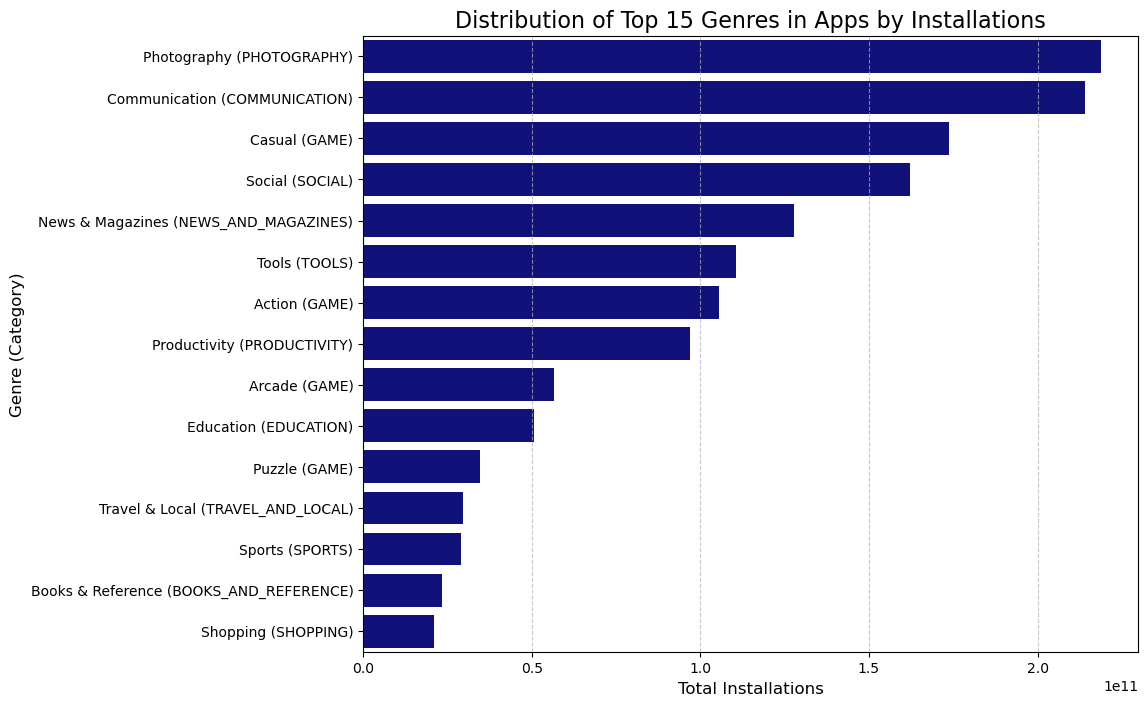

In [135]:
# Sum the installations for each genre
installations_by_genre = expanded_df.groupby('Genres')['Installs'].sum().sort_values(ascending=False)

# Select the top 15 genres based on installations
top_15_genres = installations_by_genre.head(15)

# Create a list to add the associated category in parentheses
top_15_genres_with_category = []

# Add the category in parentheses for each genre
for genre in top_15_genres.index:  # Now using `top_15_genres` instead of `top_10_genres`
    # Identify the predominant category for each genre
    categories = expanded_df[expanded_df['Genres'] == genre]['Category'].unique()
    if len(categories) > 1:
        category = expanded_df[expanded_df['Genres'] == genre]['Category'].mode()[0]
    else:
        category = categories[0]

    # Add the genre and category to the list
    top_15_genres_with_category.append(f"{genre} ({category})")

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))  # Adjusted the size of the plot to accommodate more genres
sns.barplot(y=top_15_genres_with_category, x=top_15_genres.values, color='darkblue', orient='h')

# Add the title and labels
plt.title("Distribution of Top 15 Genres in Apps by Installations", fontsize=16)
plt.xlabel("Total Installations", fontsize=12)
plt.ylabel("Genre (Category)", fontsize=12)

# Add a horizontal grid line to make the plot more readable
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The 'Game' category appears to be the most popular, as evidenced by the frequent occurrence of the string 'Game' in parentheses.  
However, in terms of genre, the most popular applications belong to the `photography and communication categories.`

**Which elements make a difference in user evaluations?**  
To gain a comprehensive overview of these 15 genres and understand the factors influencing user evaluations, we will attempt to extract review strings.

With the following code, we will randomly read 2 positive and 2 negative comments for each of these 10 genres to identify any significant elements to consider

In [139]:
# Set Pandas to display the full content of the 'Translated_Review' column
pd.set_option('display.max_colwidth', None)

# Assume 'top_15_genres_with_category' is a list of genres
top_15_genres_with_category = [
    'Photography', 'Communication', 'Casual', 'Social', 'News & Magazines',
    'Tools', 'Action', 'Productivity', 'Arcade', 'Education',
    'Travel', 'Shopping', 'Entertainment', 'Health & Fitness', 'Lifestyle'
]

# Filter the dataframe Gr to get only the apps that belong to the specified genres
app_in_top_genres = df[df['Genres'].isin(top_15_genres_with_category)]['App']
gr_filtrato = Gr[Gr['App'].isin(app_in_top_genres)].copy()  # Create a copy to avoid the warning

# Add a column that determines if the comment is positive, negative, or neutral
gr_filtrato['Sentiment_Type'] = gr_filtrato['Sentiment_Polarity'].apply(
    lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral'
)

# Dictionary to store comments for each genre
commenti_per_genere = {}

# Extract 2 positive and 2 negative comments for each genre
for genere in top_15_genres_with_category:
    # Filter apps belonging to the specific genre
    apps_in_genere = df[df['Genres'] == genere]['App']
    gr_genere = gr_filtrato[gr_filtrato['App'].isin(apps_in_genere)]

    # Separate positive and negative comments
    commenti_positivi = gr_genere[gr_genere['Sentiment_Type'] == 'positive'].head(2)
    commenti_negativi = gr_genere[gr_genere['Sentiment_Type'] == 'negative'].head(2)

    # Save comments in the dictionary
    commenti_per_genere[genere] = {
        'Positive_Comments': commenti_positivi[['App', 'Translated_Review']],
        'Negative_Comments': commenti_negativi[['App', 'Translated_Review']],
    }

# Display the results
for genere, commenti in commenti_per_genere.items():
    print(f"Genre: {genere}")
    print("Positive:")
    print(commenti['Positive_Comments'])
    print("Negative:")
    print(commenti['Negative_Comments'])
    print("\n")

Genre: Photography
Positive:
                               App  \
2181  A+ Gallery - Photos & Videos   
2189  A+ Gallery - Photos & Videos   

                                                                                                                                                                                                               Translated_Review  
2181  The good. But I 2 problems 1. I cannot remove album cover set. I change another picture. Please fix this. 2. When selecting pics right column, scroll bar gets activated tone. This irritating since scroll way back were.  
2189                                                                                                                                                                                           I love much better gallery apps..  
Negative:
                               App  \
2180  A+ Gallery - Photos & Videos   
2182  A+ Gallery - Photos & Videos   

                                                  

### What penalises the evaluation of an app?
- **Continuous crashes and slow execution:** Many comments point to problems with app stability, such as games or productivity apps that stop working after an update or become slower. It is important to ensure that apps are stable and well optimised to avoid frustration in users. 
 
- **Problems with updates:** Some users mention that after updates, apps stop working properly, as in the case of ‘Angry Birds 2’. This suggests that thorough testing is essential before releasing an update.  


- **Difficulties in use and unclear interface:** Many users report difficulties with the user interface, such as health or social apps that have a confusing or non-intuitive interface.
Attention must be paid to the design.  

- **Ads:** Several negative comments refer to invasive or annoying advertisements, which can damage the user experience. 
Advertising should not be too invasive.


- **Lack of functionality:** Users often want more customisation in apps or to add new features. For example, some negative comments in Photo apps mention that essential features, such as the possibility to delete albums or photos, are no longer available or do not work as they should after updates

- **Quality assessment:** Communication or music apps might be criticised for poor call or connection quality (e.g. for 2ndLine - Second Phone Number, the review reads ‘I don't understand what they are saying, the connection is bad’). Ensuring that the audio and video quality is up to standard is crucial for apps such as social media or communication apps.

### What improves evaluation?

- **Free features:** Apps that offer free features such as in the case of ‘Angry Birds 2’, where users enjoy watching free videos to gain benefits, can improve user engagement.  

- **Regular updates:** Many apps are considered obsolete when they are not updated regularly, as in the case of the ‘7 Day Food Journal Challenge’ which was abandoned without updates for a year.

- **Importance of error and performance management:** Users report frustration when apps do not handle errors correctly (e.g. apps that suddenly close or do not respond correctly to user commands). Error handling and the implementation of a clear feedback system are essential.    

- **User support:** Some users complain about not receiving quick support to solve problems. It is essential to have an efficient customer support that resolves any issues quickly.

## Free App VS Paid App.
### What effect on the rating?

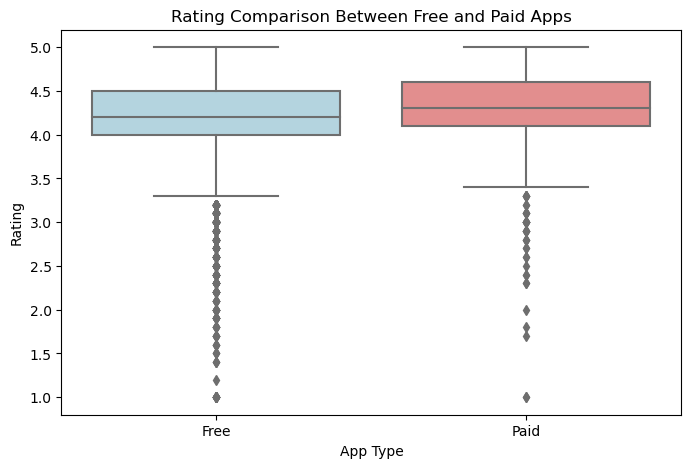

In [143]:
# Boxplot to compare app ratings by type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Type', y='Rating', palette=['lightblue', 'lightcoral'])

plt.title('Rating Comparison Between Free and Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()

**The variability of the rating distribution is similar for both categories (Free and Paid).** 

Paid apps have slightly higher ratings than Free apps.   
The dense presence of outliers in Free apps means they have lower ratings than Paid apps.

This suggests that paid apps may offer a more stable and satisfying experience, while free apps may vary greatly in quality.

## What effect on sentiment?

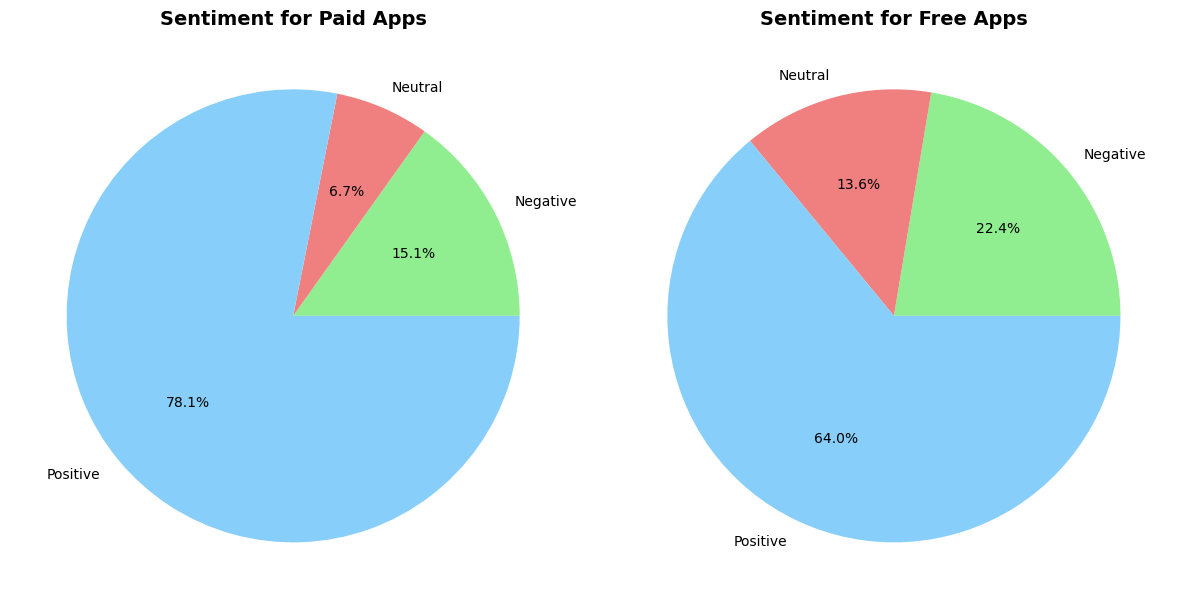

In [147]:
# Calculate sentiment percentage by app type (Paid vs Free)
sentiment_percentage = merged_df.groupby(['Type', 'Sentiment']).size().unstack(fill_value=0)
sentiment_percentage = sentiment_percentage.apply(lambda x: x / x.sum() * 100, axis=1)

# Split data for Paid and Free apps
paid_sentiment = sentiment_percentage.loc['Paid']
free_sentiment = sentiment_percentage.loc['Free']

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Paid apps
axes[0].pie(paid_sentiment, labels=paid_sentiment.index, autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral', 'lightskyblue'])
axes[0].set_title('Sentiment for Paid Apps', fontsize=14, fontweight='bold')
axes[0].set_ylabel('', fontsize=12, fontweight='bold')

# Pie chart for Free apps
axes[1].pie(free_sentiment, labels=free_sentiment.index, autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral', 'lightskyblue'])
axes[1].set_title('Sentiment for Free Apps', fontsize=14, fontweight='bold')
axes[1].set_ylabel('', fontsize=12, fontweight='bold')

# Bold axis labels
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

**The difference in percentage distribution is slight.  
But the paid apps tend to have more positive sentiment**

## Analysis of Reviews and Sentiment

# Sentiment

### Text analysis

The next output will display selected positive and negative reviews for the 10 most popular categories, filtered by a high level of `Sentiment_Subjectivity`.   
This helps identify key elements influencing sentiment.

In [154]:
from collections import Counter
from wordcloud import WordCloud

In [156]:
# Select the top 15 categories by number of installations
top_categories = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False).head(15)

# Filter apps belonging to the top categories
apps_top_categories = df[df['Category'].isin(top_categories.index)][['App', 'Category']]

# Merge the reviews dataset with the apps dataset
merged_df = Gr.merge(apps_top_categories, on='App')

# Verify that 'Category' is present in the DataFrame merged_df
if 'Category' not in merged_df.columns:
    print("Error: 'Category' not present in merged_df")
else:
    print("Columns in the DataFrame 'merged_df':", merged_df.columns)

# Select reviews for each category
extreme_sentiment_apps = []

for category in top_categories.index:
    target_apps = merged_df[merged_df['Category'] == category]

    # Filter reviews with Sentiment_Subjectivity equal to 1 (completely subjective)
    subjectivity_1_reviews = target_apps[target_apps['Sentiment_Subjectivity'] == 1]

    # Select positive and negative reviews based on 'Sentiment_Subjectivity' equal to 1
    positive_reviews = subjectivity_1_reviews[subjectivity_1_reviews['Sentiment'] == 'Positive'].nlargest(2, 'Sentiment_Subjectivity')[['App', 'Sentiment', 'Sentiment_Subjectivity', 'Translated_Review', 'Category']]
    negative_reviews = subjectivity_1_reviews[subjectivity_1_reviews['Sentiment'] == 'Negative'].nsmallest(2, 'Sentiment_Subjectivity')[['App', 'Sentiment', 'Sentiment_Subjectivity', 'Translated_Review', 'Category']]

    # Combine the results of positive and negative reviews
    extreme_sentiment_apps.append(pd.concat([positive_reviews, negative_reviews]))

# Create a final DataFrame with extreme reviews
extreme_sentiment_df = pd.concat(extreme_sentiment_apps)

# Verify that 'Category' is present in the final DataFrame
if 'Category' not in extreme_sentiment_df.columns:
    print("Error: 'Category' not present in extreme_sentiment_df")
else:
    print("Columns in the DataFrame 'extreme_sentiment_df':", extreme_sentiment_df.columns)

# Print the results
for category in top_categories.index:
    print(f"Category: {category}\n")

    if category not in extreme_sentiment_df['Category'].values:
        print(f"No reviews available for the category '{category}'.\n")
    else:
        target_apps = extreme_sentiment_df[extreme_sentiment_df['Category'] == category]
        for _, row in target_apps.iterrows():
            print(f"App: {row['App']}\nSentiment: {row['Sentiment']}\nSubjectivity: {row['Sentiment_Subjectivity']}\nReview: {row['Translated_Review']}\n")
    print("-" * 50)

Columns in the DataFrame 'merged_df': Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Category'],
      dtype='object')
Columns in the DataFrame 'extreme_sentiment_df': Index(['App', 'Sentiment', 'Sentiment_Subjectivity', 'Translated_Review',
       'Category'],
      dtype='object')
Category: GAME

App: 1LINE – One Line with One Touch
Sentiment: Positive
Subjectivity: 1.0
Review: Very nice

App: 1LINE – One Line with One Touch
Sentiment: Positive
Subjectivity: 1.0
Review: Superb

App: 8 Ball Pool
Sentiment: Negative
Subjectivity: 1.0
Review: I keep getting requests gifts even though person say sent never sent all. I know today I got request friend passed away couple months ago. Absolutely disgusting. 1 star

App: Angry Birds Classic
Sentiment: Negative
Subjectivity: 1.0
Review: Devs still can't bothered fix freezing issue. I understand must concentrating underpar sequel (2) disgusting.

-------------------------------------------

Beyond performance issues, usability, and bugs, another important aspect to consider is compatibility.

Compatibility remains a critical concern in app development, as highlighted by several user reviews. For instance:

- *"Every time crash! Error message showing 'Android message unfortunately stopped'. Please fix this."* — **Android Messages**  
- *"It no longer opens on phones (except Note 8)..."* — **AC - Tips & News for Android™**

These examples emphasize how device-specific failures can severely impact user experience and satisfaction. Addressing compatibility across different devices and OS versions should be a top priority to ensure broad accessibility and reduce negative sentiment.

# FINAL CONSIDERATION

To create a successful app, consider several key factors:

- **Performance optimisation**
Ensure that the app is stable and well optimised. Users are particularly sensitive to crashes and slowdowns.

- **Error Management:** Implement robust error management and a clear feedback system to solve problems in a timely manner. Apps that suddenly close or do not respond correctly to user input generate frustration.

  
- **Clear and intuitive interface:** Many users complain about unintuitive interfaces.

  
- **Regular updates:** Provide constant updates to fix bugs, improve functionality and keep the app aligned with user expectations. Apps that are not updated for a long period tend to look outdated.

  
- **Management of reviews and feedback:** continuously monitor reviews.

  
- **Quality-price ratio**: if an app is paid for, users expect a flawless experience. It is essential to invest in a dedicated team that ensures regular updates, optimal performance and timely support to keep satisfaction high and justify the cost.

  
- **Compatibility:** ensure that the app works properly on a variety of devices and operating systems.

- **Pubblicità e monetizzazione:**  if the app is free, strike a balance between monetisation and user experience. Invasive advertising can damage the user experience and lead to negative reviews.

  
- **Premium features:** Offer premium functionality without compromising the user experience for those who do not purchase the paid version. Providing good value in the free version incentivises users to upgrade to the paid version.

  
- **User support:** Implement an efficient customer support system to resolve user issues quickly. Good customer service can make a difference in reviews and overall user satisfaction.

  
- **Customisation Options:** Offering users customisation options to adapt the app to their personal needs can improve engagement and satisfaction. 
